In [49]:
import pandas as pd
import requests
from datetime import datetime
from obspy.geodetics.base import gps2dist_azimuth
import matplotlib.pyplot as plt

C:\Users\yini\anaconda3\envs\obspy\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


LATB
LXIB
NACB
NNSB
SSLB
VWDT
WARB
WUSB
EAH
EWT
HWA
EGFH
ETLH
NDT
SHUL
ENA
ENT
ENT
ESL
ETL
ETM
TWD
NNS
TWC
TWE
WHF
F015
F026
F067


<AxesSubplot:xlabel='2', ylabel='1'>

<Figure size 432x288 with 0 Axes>

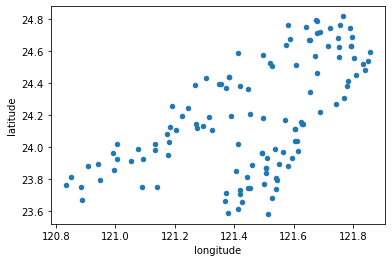

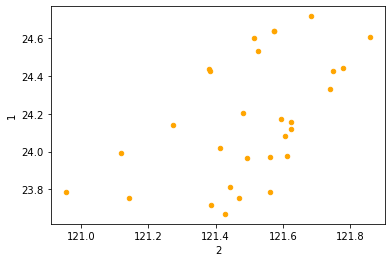

In [51]:
#read weather station information
rainsta_exc=pd.read_excel('C:/Users/yini/Desktop/rainfall/rainfall_station.xlsx')
renddate=pd.to_datetime(rainsta_exc['撤站日期']).dt.strftime("%Y%m%d").fillna(99999999)
rainsta_exc=rainsta_exc[renddate.astype(int)>=20170101].reset_index()
rstacode=rainsta_exc['站號']
rstaname=rainsta_exc['站名']
rlon=rainsta_exc['經度']
rlat=rainsta_exc['緯度']
rstartdate=pd.to_datetime(rainsta_exc['資料起始日期']).dt.strftime("%Y%m%d")
renddate=pd.to_datetime(rainsta_exc['撤站日期']).dt.strftime("%Y%m%d").fillna(99999999)


#read seismic station information
seissta_exc=pd.read_csv('C:/Users/yini/Desktop/rainfall/stn_info_hualien',header=None,sep=',')
sstacode=seissta_exc[0]
slon=seissta_exc[2]
slat=seissta_exc[1]

chosen_stacode=[]
chosen_staname=[]
chosen_lon=[]
chosen_lat=[]
for i in range(len(sstacode)):
    print(sstacode[i])
    for j in range(len(rstacode)):
        dis=gps2dist_azimuth(slat[i],slon[i],rlat[j],rlon[j])[0]
        if dis/1000 <= 15:
            chosen_stacode.append(rstacode[j])
            chosen_staname.append(rstaname[j])
            chosen_lon.append(rlon[j])
            chosen_lat.append(rlat[j])
chosen=pd.DataFrame({'station code':chosen_stacode,'station name':chosen_staname,'longitude':chosen_lon,'latitude':chosen_lat})
chosen=chosen.drop_duplicates().reset_index()
figure = plt.figure()
chosen.plot.scatter(x='longitude',y='latitude')
seissta_exc.plot.scatter(x=2,y=1,c='orange')

In [8]:
#weather station list
def get_area_stations():
    area=['https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466990&stname=%25E8%258A%25B1%25E8%2593%25AE&datepicker=2021-01#',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467060&stname=%25E8%2598%2587%25E6%25BE%25B3&datepicker=2021-01#',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467540&stname=%25E5%25A4%25A7%25E6%25AD%25A6&datepicker=2021-01#',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466910&stname=%25E9%259E%258D%25E9%2583%25A8&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466880&stname=%25E6%259D%25BF%25E6%25A9%258B&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467490&stname=%25E8%2587%25BA%25E4%25B8%25AD&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467410&stname=%25E8%2587%25BA%25E5%258D%2597&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467440&stname=%25E9%25AB%2598%25E9%259B%2584&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466940&stname=%25E5%259F%25BA%25E9%259A%2586&datepicker=2021-01',
         'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=467050&stname=%25E6%2596%25B0%25E5%25B1%258B&datepicker=2021-01',]
    area_l=['花蓮縣','宜蘭縣','台東縣','臺北市','新北市','臺中市','臺南市','高雄市','基隆市','桃園市']
    sta_l=[]
    for url in area:
        stname.append(url.split('&')[-2].split('=')[-1])
        res=requests.get(url)
        df=pd.read_html(res.text)[0]
        df=df[2][0].split()

        cc=df.copy()
        for i in range(len(cc)):
            if cc[i]=='(撤銷站)':
                cc[i-1]=cc[i-1]+''+cc[i]
        stas=list(filter(lambda x: x!='(撤銷站)' , cc))
        sta_l.append(stas)
    station_l=pd.DataFrame({})
    return station_l

%25E8%258A%25B1%25E8%2593%25AE
%25E8%2598%2587%25E6%25BE%25B3
%25E5%25A4%25A7%25E6%25AD%25A6


In [3]:
#get date list
def get_mon_list(startdate,enddate='2021-12-01'):
    date_l=[datetime.strftime(x,'%Y-%m') for x in list(pd.date_range(start=startdate, end=enddate, freq='M'))]
    return date_l

In [4]:
def get_monthly_weather_data():
    

[['466990_花蓮',
  'C0T790_大禹嶺',
  'C0T820_天祥',
  'C0T9D0_和中',
  'C0T9E0_大坑',
  'C0T9F0_水璉',
  'C0T9G0_鳳林山',
  'C0T9H0_加路蘭山',
  'C0T9I0_豐濱',
  'C0T9M0_靜浦',
  'C0T9N0_富里',
  'C0T870_鯉魚潭',
  'C0T900_西林',
  'C0T960_光復',
  'C0T9A0_月眉山',
  'C0T9B0_水源',
  'C0Z020_明里',
  'C0Z050_佳心',
  'C0Z061_玉里',
  'C0Z070_舞鶴',
  'C0Z080_富源',
  'C0Z100_東華',
  'C0Z150_吉安光華',
  'C0Z160_鳳林',
  'C0Z170_卓溪',
  'C0Z180_新城',
  'C0Z190_富世',
  'C0Z200_萬榮',
  'C0Z210_瑞穗',
  'C0Z220_和平林道',
  'C0Z230_和平',
  'C0Z250_瑞穗林道',
  'C0Z270_蕃薯寮',
  'C0Z280_德武',
  'C0Z290_赤柯山',
  'C0Z300_東里',
  'C0Z310_清水斷崖',
  'C0Z320_清水林道',
  'C0Z330_安通山',
  'C1S850_豐南',
  'C1T800_洛韶',
  'C1T810_慈恩',
  'C1T830_布洛灣',
  'C1T940_大觀',
  'C1T950_太安',
  'C1T970_大農',
  'C1T980_龍澗',
  'C1T990_高寮',
  'C1TA00_太魯閣',
  'C1T920_中興',
  'C1Z110_三棧',
  'C1Z120_壽豐',
  'C1Z130_銅門',
  'C1Z140_荖溪',
  'C1Z240_中平林道',
  'C1Z030_紅葉',
  'C1Z040_立山',
  'C1Z090_三棧(撤銷站)',
  'C1Z010_卓樂(撤銷站)',
  'C1Z020_明里(撤銷站)',
  'C1T930_鳳林(撤銷站)',
  'C1T850_吉安(撤銷站)',
  'C1T860_銅門(撤銷站)',
  

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

r = requests.get('https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466910&stname=%25E9%259E%258D%25E9%2583%25A8&datepicker=2019-08')
csvfile="test.csv"
r.encoding="utf-8"
soup=BeautifulSoup(r.text,"lxml")
tag_table=soup.find(id="MyTable")
rows=tag_table.findAll("tr")

with open(csvfile,"w+",newline="",encoding="utf-8") as fp:
    writer=csv.writer(fp)
    for row in rows:
        rowList=[]
        for cell in row.findAll(["td","th"]):
            rowList.append(cell.get_text().replace("\n","").replace("\r",""))
        writer.writerow(rowList)

In [16]:
cell.get_text().replace('\n','').replace('\r','')

'3.8\xa0'